In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

# Introduction to AI and OpenVino
## Lecture 08

## Unsupervised learning

In [2]:
###------------------
### Import statements
###------------------

import os
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris, load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#from sklearn.ensemble import RandomTreesEmbedding
from sklearn.manifold import TSNE

from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.random_projection import SparseRandomProjection

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import offsetbox
import matplotlib.patheffects as PathEffects

In [3]:
inpDir = os.path.join('..', '..', 'input')
outDir = '../output'
subDir = 'machine_learning'

RANDOM_STATE = 24
np.random.seed(RANDOM_STATE)

TEST_SIZE = 0.2

## Helper Function

In [4]:
# Utility function to visualize the outputs of PCA and t-SNE

def digit_scatter(x, labels):
    num_classes = len(np.unique(labels))# choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", num_classes))
    fig, ax = plt.subplots(figsize=(6, 6)) 
    sc = ax.scatter(x[:,0], x[:,1], s=15, 
                    c=palette[labels.astype(np.int16)], 
                    edgecolors = 'k')
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):
        # Position of each label at median of data points.
        xtext, ytext = np.median(x[labels == i, :], axis=0) 
        txt = ax.text(xtext, ytext, str(i), fontsize=20) # string at median point
        
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        
        # txts.append(txt)

    return

### PCA

In [6]:
iris = load_iris()

features = iris.data

labels = iris.target

class_labels = np.unique(labels)
class_labels

array([0, 1, 2])

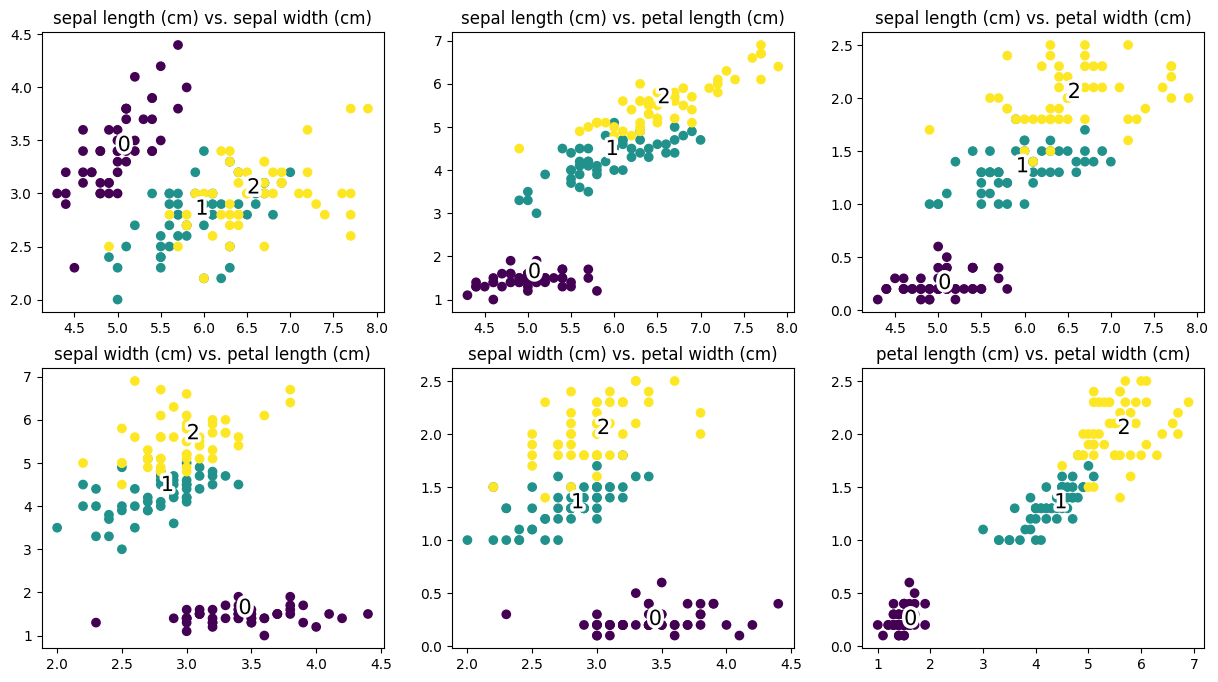

In [8]:
# Plot the features
kk = 1
plt.figure( figsize = (15 , 8) )
for ii in range (features.shape[1]-1):
    for jj in range (ii+1, (features.shape[1])):
        ax = plt.subplot(2, 3, kk )
        kk += 1
        ax.scatter( features [ :, ii], features [ :, jj], c = labels)
        
        for i in class_labels:
            # Position of each label at median of data points.
            xtext = np.median(features[labels == i, ii], axis=0)
            ytext = np.median(features[labels == i, jj], axis=0)
            txt = ax.text(xtext, ytext, str(i), fontsize=15)
            txt.set_path_effects([
                PathEffects.Stroke(linewidth=5, foreground="w"),
                PathEffects.Normal()])

        ax.set_title('{} vs. {}'.format(iris.feature_names[ii], 
                                       iris.feature_names[jj]))
        ax.axis('tight')
plt.show()

In [11]:
pca = PCA(n_components=2)

pca.fit(features)

PCA(n_components=2)

In [12]:
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [13]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [17]:
pca.explained_variance_ratio_.sum()

0.977685206318795

In [16]:
features_pca = pca.transform(features)

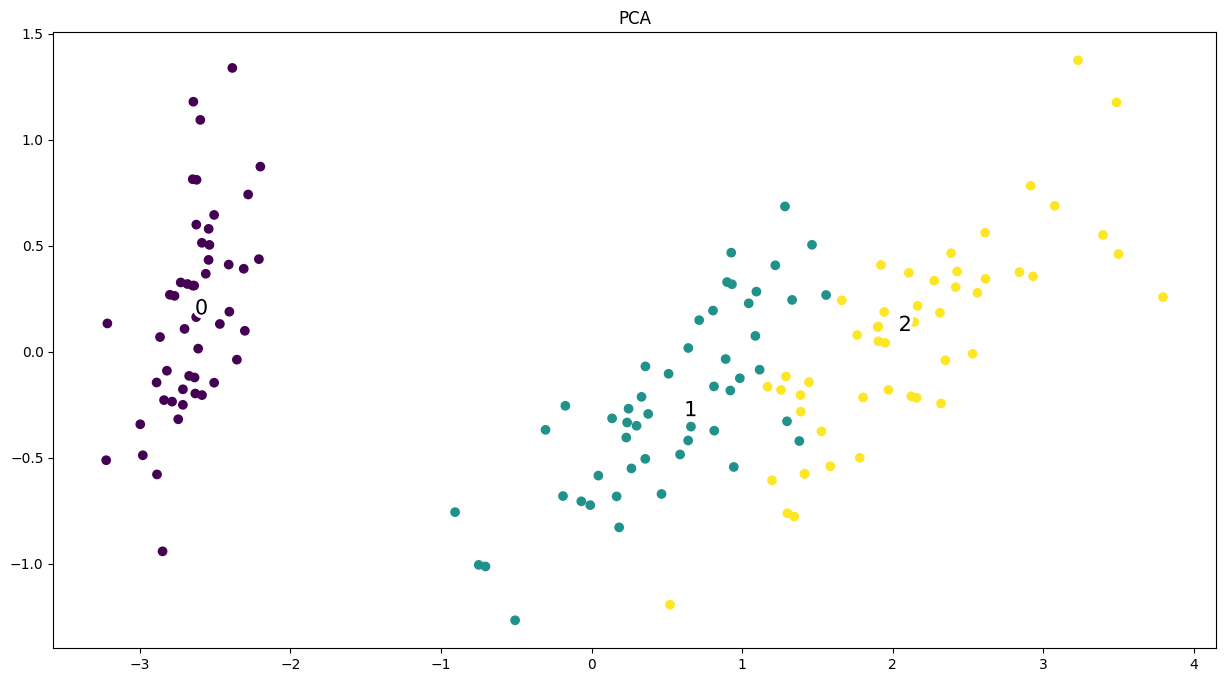

In [19]:
# Plot the features
fig, ax = plt.subplots( figsize = (15 , 8) )
ax.scatter( features_pca [ :, 0], features_pca [ :, 1], c = labels)
        
for i in class_labels:
    # Position of each label at median of data points.
    xtext = np.median(features_pca[labels == i, 0], axis=0)
    ytext = np.median(features_pca[labels == i, 1], axis=0)
    txt = ax.text(xtext, ytext, str(i), fontsize=15)
    txt.set_path_effects([
        PathEffects.Stroke(linewidth=5, foreground="w"),
        PathEffects.Normal()])

ax.set_title('PCA')
ax.axis('tight')
plt.show()

In [20]:

print ("Mean = {:s}\n".format(str(np.round(features_pca.mean(axis=0), 
                                           decimals=5))))

print ("Std Dev = {:s}\n".format(str(np.round(features_pca.std(axis=0), 
                                              decimals=5))))

# Do they have any correlation?? 
print ("Corr Coef. = \n", (np.corrcoef(features_pca.T)))

Mean = [-0. -0.]

Std Dev = [2.0494  0.49097]

Corr Coef. = 
 [[1.00000000e+00 9.15931158e-16]
 [9.15931158e-16 1.00000000e+00]]


## Manifold Learning

In [22]:
digits = load_digits()

X, y = digits.data, digits.target

n_sample, n_features = X.shape

n_neighbors = 30

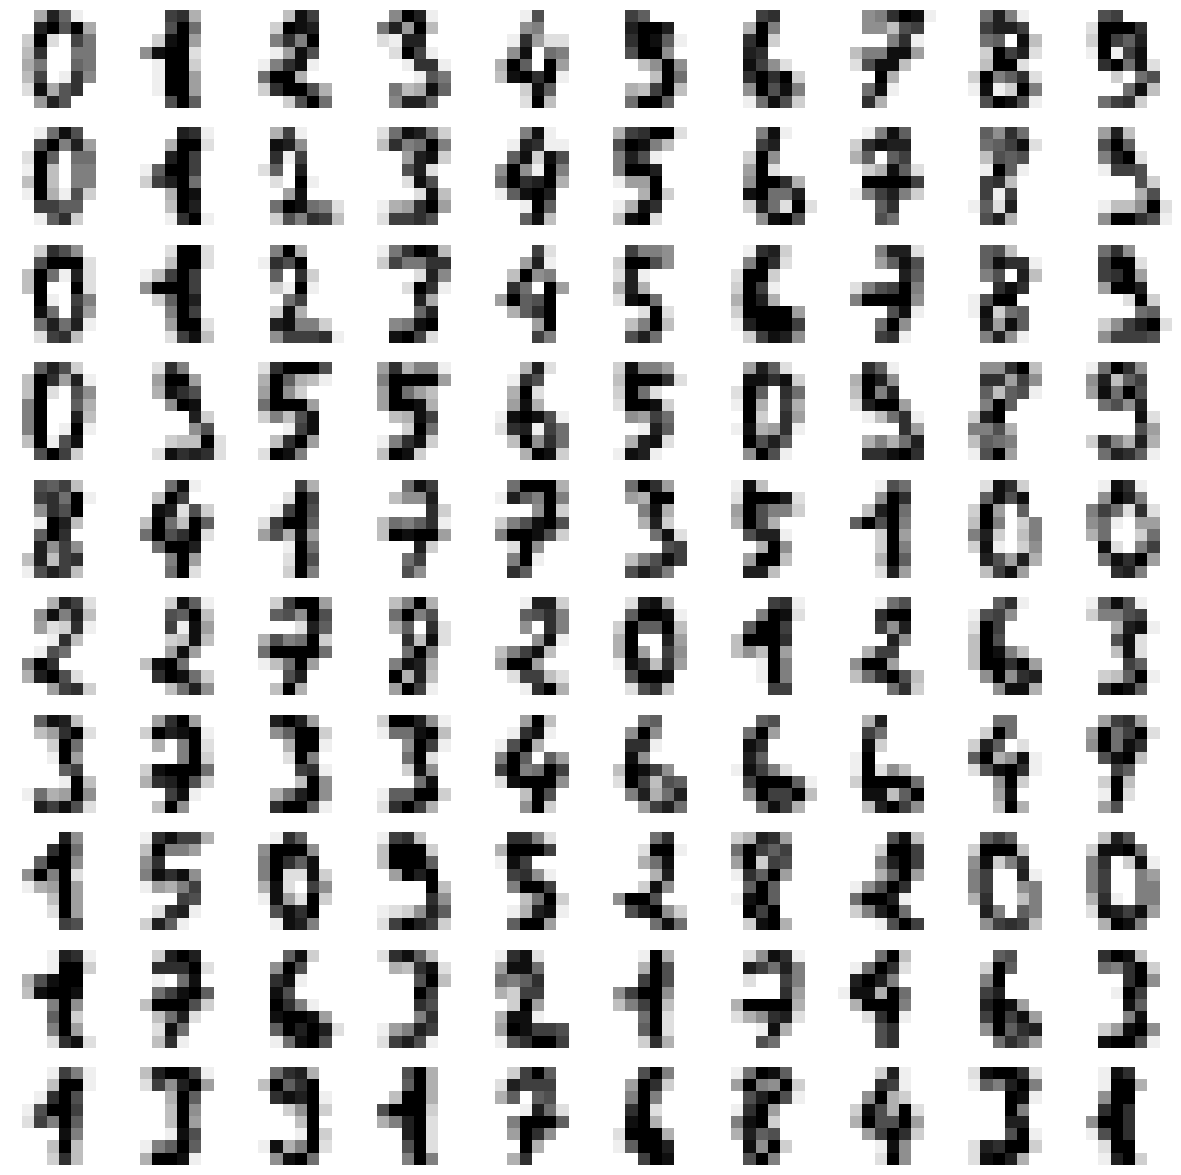

In [24]:
fig, axes = plt.subplots(10, 10, figsize = (15, 15))

for idx, ax in enumerate(axes.ravel()):
    ax.imshow(X[idx].reshape((8,8)), cmap = plt.cm.binary)
    ax.axis('off')

In [25]:
sc = StandardScaler()

X_scaled = sc.fit_transform(X)

In [26]:
pca = PCA(n_components=2)

X_pca = pca.fit_transform(X_scaled, y)

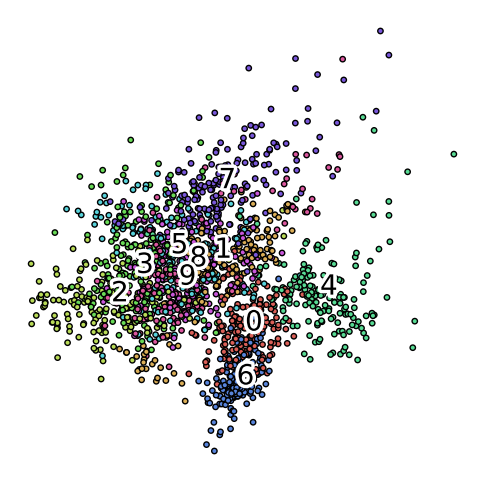

In [27]:
_ = digit_scatter(X_pca, y)

In [28]:
lda = LinearDiscriminantAnalysis(n_components=2)

data = X_scaled.copy()

data.flat[::X_scaled.shape[1]+1] += 0.01

projections = lda.fit_transform(data, y)

print (projections.shape)

(1797, 2)


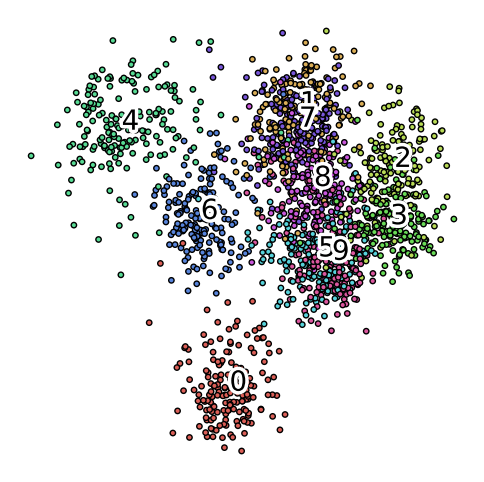

In [29]:
_ = digit_scatter(projections, y)

In [30]:
tsne = TSNE(
        n_components=2,
        n_iter=500,
        n_iter_without_progress=150,
        n_jobs=16,
        random_state=RANDOM_STATE,
    )

projections = tsne.fit_transform(X_scaled, y)

print (projections.shape)

(1797, 2)


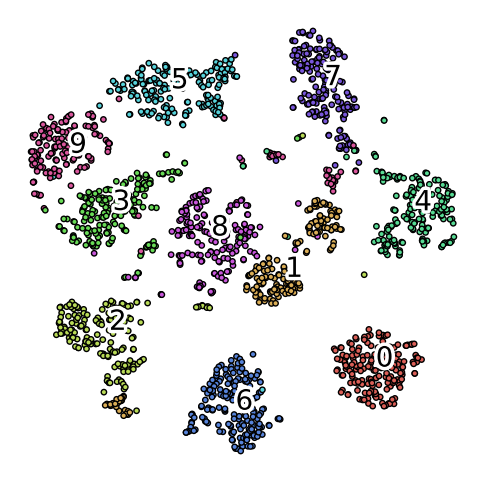

In [31]:
_ = digit_scatter(projections, y)

In [32]:
from sklearn.cluster import KMeans
pca = PCA ( n_components = 2 ) # reducing them to two components
features_pca = pca.fit_transform ( X )

kmeans = KMeans(n_clusters = 10, random_state = RANDOM_STATE ) # Note: we need to know expected clusters beforehand
kmeans.fit( features_pca )

print("Centers :\n", np.round(kmeans.cluster_centers_, decimals=2))


Centers :
 [[ 15.03  13.64]
 [ -0.75  -3.1 ]
 [-10.05   9.42]
 [  7.09 -17.26]
 [ -3.61 -16.38]
 [  1.33  21.75]
 [ 15.52  -6.05]
 [-21.13   8.26]
 [ 24.67   3.73]
 [-14.7   -6.26]]


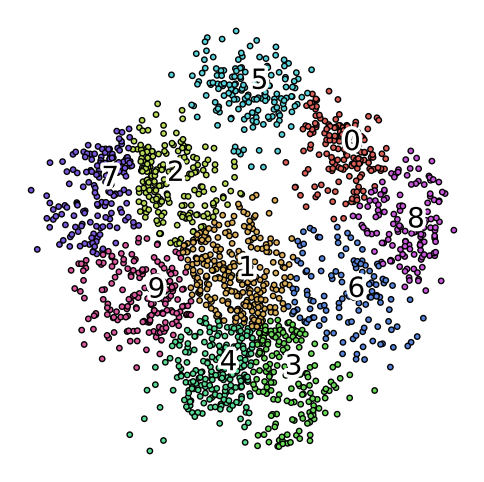

In [33]:
_ = digit_scatter(features_pca, kmeans.labels_)

## Univariate Feature Selection

In [36]:
from sklearn.feature_selection import SelectKBest, chi2

features_new = SelectKBest(chi2, k=2).fit_transform(features, labels)

features_new.shape


(150, 2)

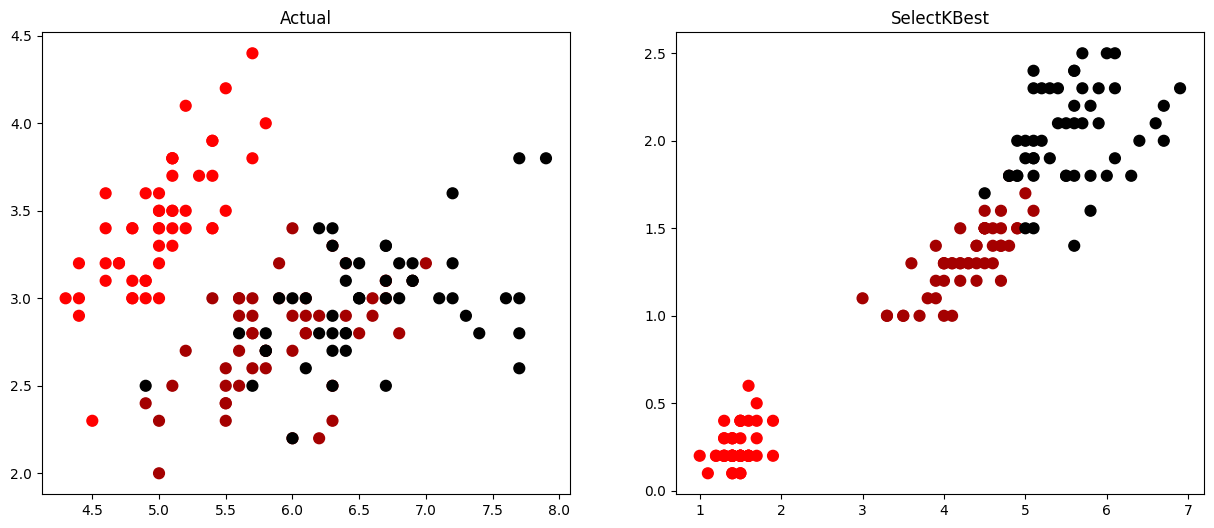

In [37]:
fig, axes = plt.subplots(1,2, figsize =(15,6))
ax = axes[0]
ax.scatter( features [ :, 0], features [ :, 1], 
           c = labels, cmap = plt.cm.flag, s = 60 )
ax.set_title('Actual')

ax = axes[1]
ax.scatter( features_new [ :, 0], features_new [ :, 1], 
           c = labels, cmap = plt.cm.flag, s = 60 )
ax.set_title('SelectKBest');

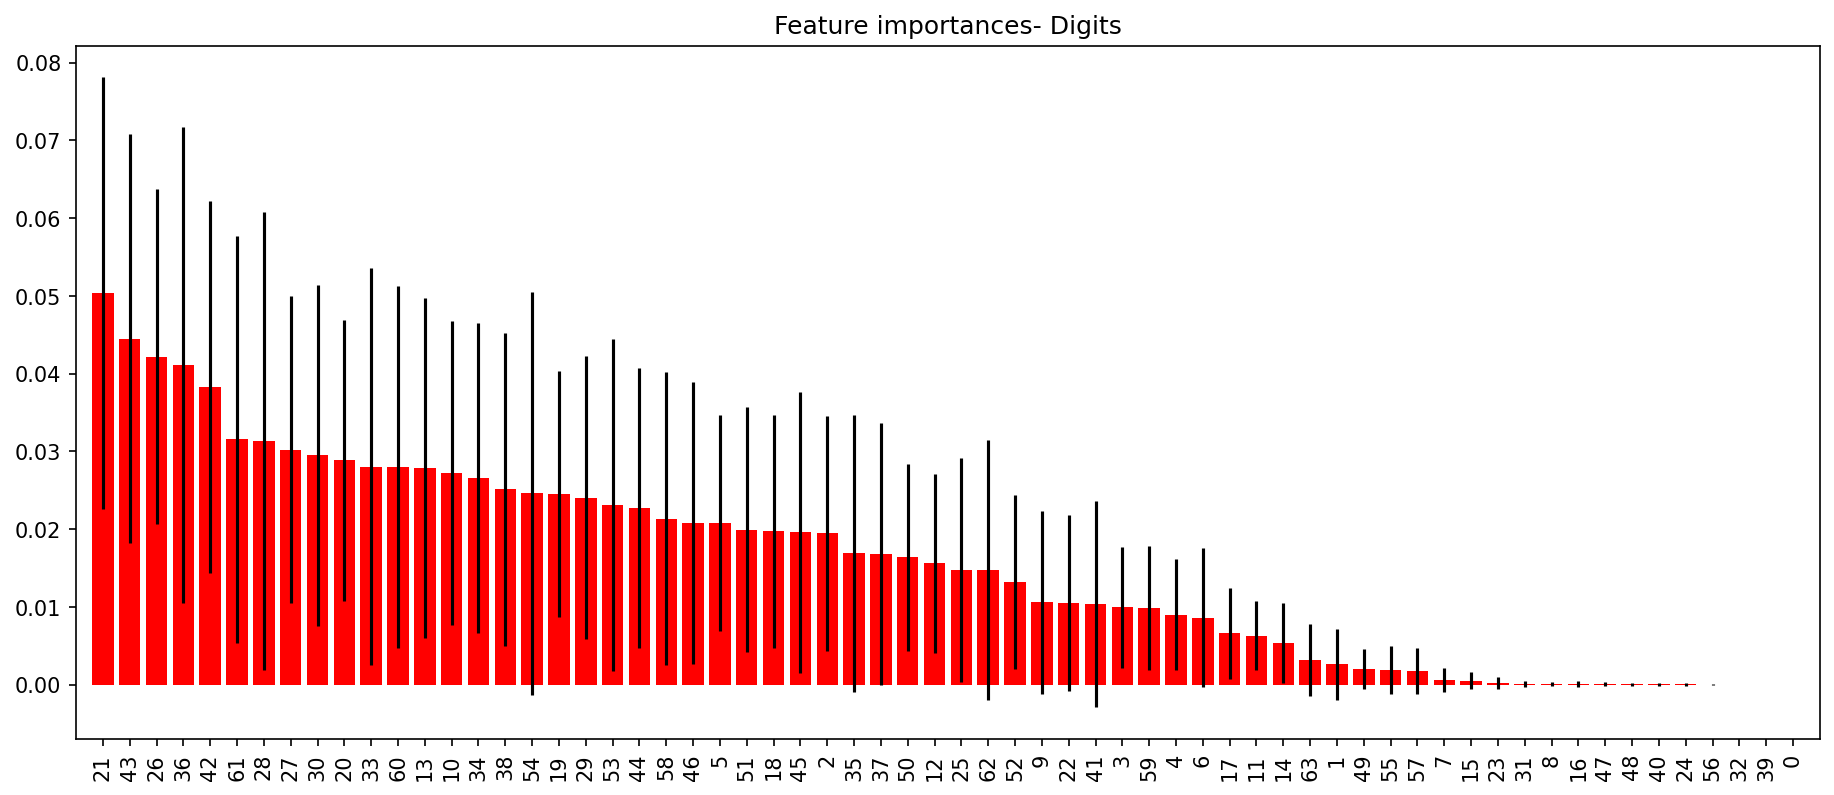

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X,y)
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
n_cols = 64
plt.figure( figsize = ( 15, 6), dpi = 150)
plt.title('Feature importances- Digits')
plt.bar(range(n_cols), importances[indices[:n_cols]], 
        color = "r", yerr = std[indices[:n_cols]], align = "center")
plt.xticks(range(n_cols), indices[:n_cols])
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.xlim([-1, n_cols])
plt.show()

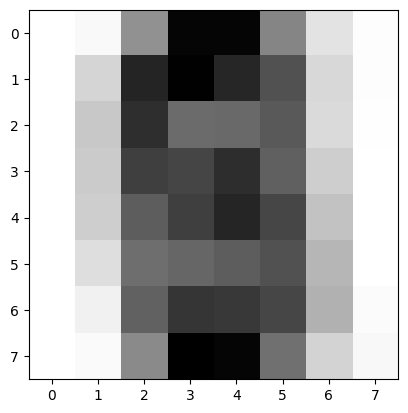

In [44]:
plt.imshow(np.mean(X, axis=0).reshape(8,8), cmap= plt.cm.binary)